In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
# Function to create Two dataframes. One with countries as Index and the other with Years as Index
def read_dataset(name):
    df_c = pd.read_excel(name)[2:].reset_index(drop=True)
    df_c.columns = df_c.iloc[0]
    df_c = df_c[1:] # Dataset by Countries
    df_c = df_c.dropna(thresh=246,axis=1) # Dropping columns with a lot of missing values

    df_t = df_c.T
    df_t = df_t.reset_index()
    df_t.columns = df_t.loc[0]
    df_t = df_t[4:].reset_index(drop=True)
    df_t.columns.names = [""]
    df_t.index.names = ["Year"] # Dataset by Years

    return df_c, df_t

In [3]:
# Running the Function
df_c, df_t = read_dataset("API_NY.GDP.MKTP.CD_DS2_en_excel_v2_4752281.xls")

## **Dataset by Countries**

In [4]:
df_c.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
32,Brunei Darussalam,BRN,GDP (current US$),NY.GDP.MKTP.CD,6.001153e+09,5.601091e+09,5.843329e+09,6.557333e+09,7.872333e+09,9.531403e+09,...,1.852532e+10,1.904794e+10,1.809383e+10,1.709834e+10,1.293039e+10,1.140085e+10,1.212810e+10,1.356735e+10,1.346942e+10,1.200583e+10
112,Ireland,IRL,GDP (current US$),NY.GDP.MKTP.CD,1.002076e+11,1.093467e+11,1.285960e+11,1.646708e+11,1.943721e+11,2.118770e+11,...,2.389756e+11,2.254968e+11,2.382793e+11,2.589696e+11,2.915800e+11,2.989282e+11,3.354308e+11,3.850417e+11,3.991221e+11,4.258890e+11
63,Early-demographic dividend,EAR,GDP (current US$),NY.GDP.MKTP.CD,3.382509e+12,3.352884e+12,3.259978e+12,3.628232e+12,4.224920e+12,4.927149e+12,...,9.720073e+12,1.015350e+13,1.029558e+13,1.064832e+13,1.012902e+13,1.045439e+13,1.129126e+13,1.140113e+13,1.164379e+13,1.084171e+13
246,Tuvalu,TUV,GDP (current US$),NY.GDP.MKTP.CD,1.507421e+07,1.396504e+07,1.684233e+07,1.945651e+07,2.279747e+07,2.290951e+07,...,3.919546e+07,3.934562e+07,3.861749e+07,3.875969e+07,3.681166e+07,4.162950e+07,4.521766e+07,4.781829e+07,5.422315e+07,5.505471e+07
153,Maldives,MDV,GDP (current US$),NY.GDP.MKTP.CD,6.243371e+08,8.700305e+08,8.970312e+08,1.052121e+09,1.226830e+09,1.163362e+09,...,2.774352e+09,2.886171e+09,3.295011e+09,3.697352e+09,4.109425e+09,4.379136e+09,4.754176e+09,5.300963e+09,5.607763e+09,3.742770e+09


In [5]:
# Selecting the Top 15 Countries that are already well known for high GDP
top_15_countries = ["United States","China","Japan","Germany","United Kingdom","India","France","Italy","Canada","South Korea",
                    "Russia","Brazil","Australia","Spain","Indonesia", "Russian Federation", "Korea, Rep."]
                    
df_c[df_c["Country Name"].isin(top_15_countries)][["Country Name", 2020.0]]

,Country Name,2020.0
14,Australia,1.327836e+12
30,Brazil,1.448566e+12
36,Canada,1.645423e+12
41,China,1.468767e+13
56,Germany,3.846414e+12
71,Spain,1.281485e+12
78,France,2.630318e+12
82,United Kingdom,2.756900e+12
107,Indonesia,1.058689e+12
110,India,2.667688e+12


In [6]:
Top_15_GDP_countries = df_c[df_c["Country Name"].isin(top_15_countries)]["Country Name"]
Top_15_GDP_values = df_c[df_c["Country Name"].isin(top_15_countries)][2020.0]

Text(0, 0.5, 'Country')

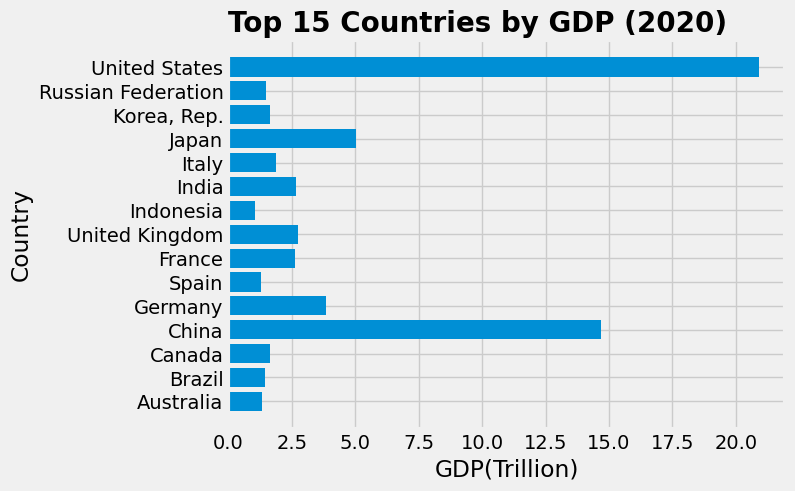

In [8]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()
ax.barh(Top_15_GDP_countries, Top_15_GDP_values)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x * 1e-12:0.1f}')) # Formats the x-axis
plt.title('Top 15 Countries by GDP (2020)',fontsize=20, fontweight='bold', loc="left")
plt.xlabel("GDP(Trillion)", loc='center')
plt.ylabel("Country")

In [9]:
# Exporting the GDP dataset to use later on in the Correlation phase
df_c.to_csv("GDP_worldwide.csv")

## **Dataset by Years**

In [4]:
df_t.tail(5)

,Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
16,2016.0,2983798882.681564,882355055412.758911,18116562464.90881,690546384903.294556,49840494025.516556,11861199830.83956,2896610479.730765,2495864756764.428223,357045156018.559631,...,3798000000.0,257095955975.529297,780889605.899977,76465590005079.0,799493897.539886,6682832632.278061,31317828583.585949,323585509674.480591,20958412538.309345,20548678100.0
17,2017.0,3092178770.94972,1020647235171.216797,18753469630.258575,683748746978.112305,68972763787.154663,13019689336.691856,3000162081.119757,2584096654452.216797,385605506854.88092,...,3794000000.0,281353402175.236084,880062103.045053,81403977427442.5,832025556.081401,7180813375.50836,26842231204.804668,381448814653.456421,25873601260.835304,17584890936.652306
18,2018.0,3202234636.871508,991022252916.701782,18053228578.887756,741689925173.426392,77792940077.119278,15156432309.897657,3218419896.964102,2785878075917.031738,422215043584.969421,...,3922000000.0,308702086757.617126,914736985.430944,86413032779059.9375,821286938.902743,7878508502.598016,21606161066.207378,404842116738.074158,26311590296.702141,18115543790.785534
19,2019.0,3310055865.921788,997534042075.18689,18799450742.782288,794543045900.109741,69309104806.631073,15401830754.077347,3155149347.806392,2808099764578.027832,417215559513.364258,...,4117000000.0,330391329475.733887,936526267.622513,87652863215992.625,852007104.660046,7899879086.430811,21887614217.174595,387934574098.170044,23308667781.225754,19284289739.051693
20,2020.0,2496648044.692738,921645942921.888184,20116137325.820553,784445725634.786377,53619071176.139008,15131866270.593649,2891001149.361105,2496251185652.42041,358868765174.924438,...,4204000000.0,343242570827.351135,896827873.114925,84906814189239.515625,807147527.615094,7716925356.125357,18840511908.248386,335442101366.417358,18110631358.31139,18051170798.941048


Text(0, 0.5, 'GDP (Trillion)')

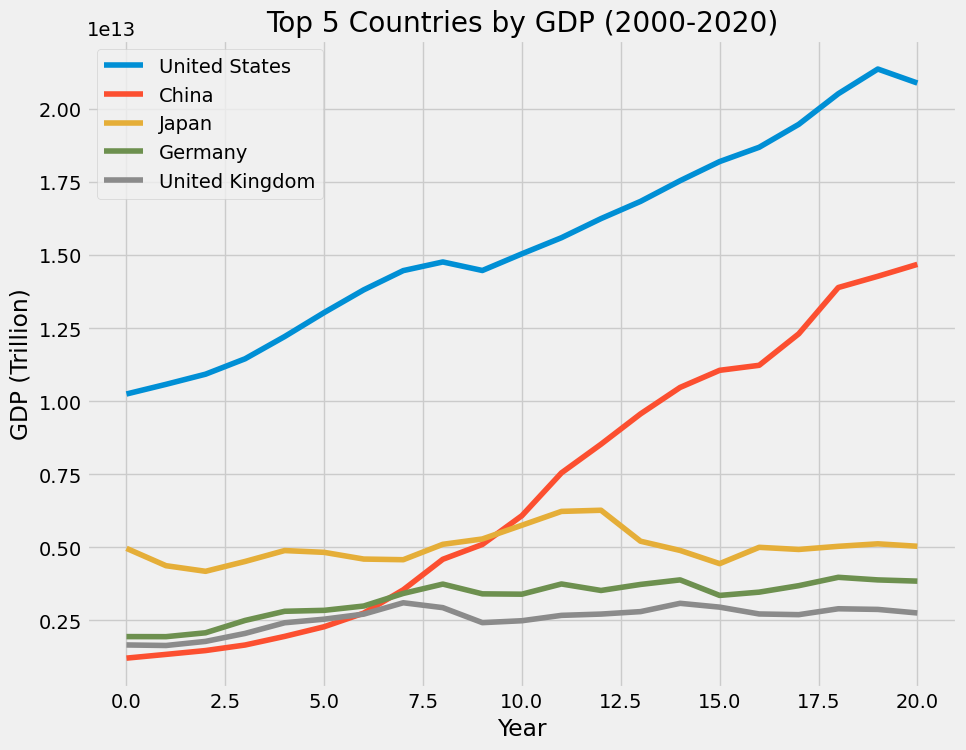

In [5]:
top_5_countries = ["United States","China","Japan","Germany","United Kingdom"]
years = df_t.index

fig, ax = plt.subplots(figsize=(10, 8))
for country in top_5_countries:
    ax.plot(years, df_t.loc[:][country], label = country)
    
plt.legend()
plt.title('Top 5 Countries by GDP (2000-2020)')
plt.xlabel("Year")
plt.ylabel("GDP (Trillion)")